In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import json
import matplotlib.ticker as ticker


In [2]:
with open('./paperswithcode.json', "r") as f:
    data = json.load(f)["stats"]

In [3]:
df_data = []
for month_data in data:
    date = pd.to_datetime(month_data["date"])
    for framework, prop in month_data["stat"]["github_frameworks_prop"].items():
            df_data.append({
                "date": date,
                "framework": framework,
                "prop": prop * 100,
            })

df = pd.DataFrame(data=df_data)
df


,date,framework,prop
0,2018-07-31,tf,37.365591
1,2018-07-31,jax,0.179211
2,2018-07-31,none,31.362007
3,2018-07-31,mxnet,0.627240
4,2018-07-31,torch,0.448029
...,...,...,...
535,2023-06-30,torch,0.000000
536,2023-06-30,caffe2,0.000000
537,2023-06-30,paddle,0.183824
538,2023-06-30,pytorch,51.838235


In [4]:
df = pd.DataFrame()

for month_data in data:
    date = pd.to_datetime(month_data["date"])
    df_temp = pd.DataFrame(month_data["stat"]["github_frameworks_prop"], index=[date])
    df = pd.concat([df, df_temp])

df.reset_index(inplace=True)
df.rename(columns={"index": "date"}, inplace=True)

sorted_columns = df.drop('date', axis=1).sum().sort_values(ascending=True).index
df = df[['date'] + sorted_columns.tolist()]
df["torch"] = df["torch"] * 100
df["caffe2"] = df["caffe2"] * 100
df["mxnet"] = df["mxnet"] * 100
df["paddle"] = df["paddle"] * 100
df["jax"] = df["jax"] * 100
df["mindspore"] = df["mindspore"] * 100
df["tf"] = df["tf"] * 100
df["none"] = df["none"] * 100
df["pytorch"] = df["pytorch"] * 100
df.head()

,date,torch,caffe2,mxnet,paddle,jax,mindspore,tf,none,pytorch
0,2018-07-31,0.448029,1.523297,0.627240,0.089606,0.179211,0.0,37.365591,31.362007,28.405018
1,2018-08-31,0.372093,0.372093,0.093023,0.000000,0.000000,0.0,30.976744,36.558140,31.627907
2,2018-09-30,0.095877,0.958773,0.575264,0.000000,0.191755,0.0,32.214765,37.583893,28.379674
3,2018-10-31,0.583090,0.218659,0.218659,0.000000,0.437318,0.0,39.650146,30.539359,28.352770
4,2018-11-30,0.249792,0.832639,0.249792,0.000000,0.083264,0.0,33.805162,34.138218,30.641132


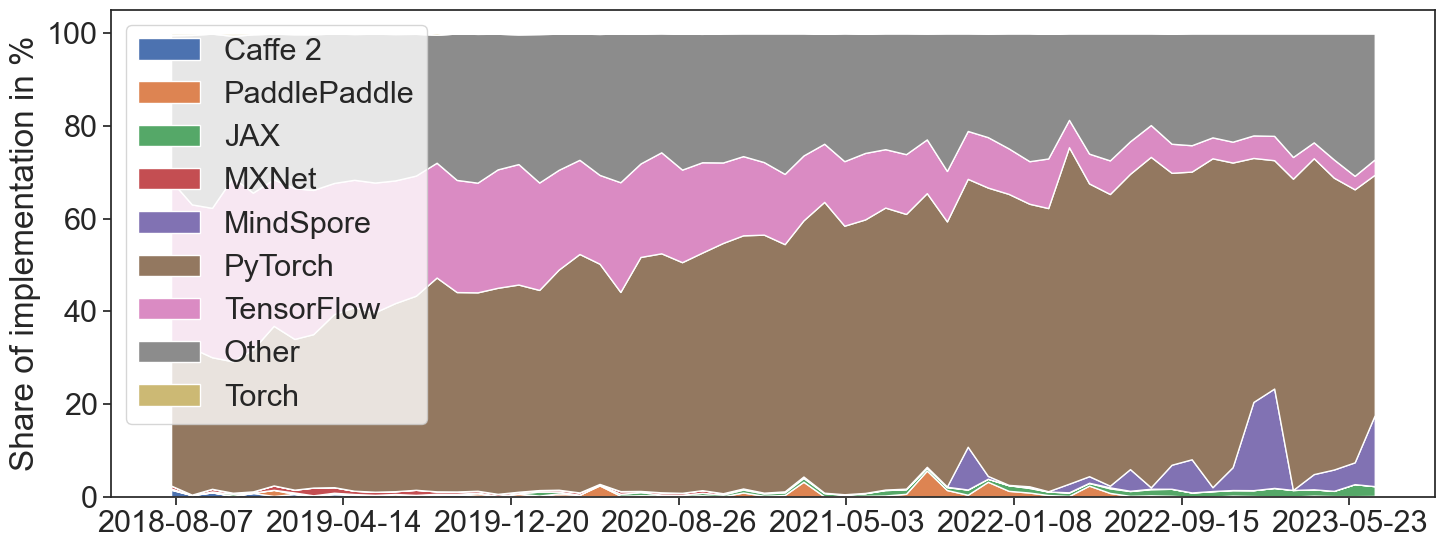

In [5]:
fig = plt.figure(figsize=(15, 6))
sb.set(font_scale=2, style="ticks")
plt.stackplot(df.date, df.caffe2, df.paddle, df.jax, df.mxnet, df.mindspore, df.pytorch, df.tf, df.none, df.torch,
              labels=['Caffe 2', "PaddlePaddle", 'JAX', 'MXNet', 'MindSpore', 'PyTorch', "TensorFlow", "Other", "Torch"])
plt.legend(loc="upper left")
plt.gca().xaxis.set_major_locator(ticker.AutoLocator())  
plt.ylabel('Share of implementation in %')
plt.tight_layout()
plt.savefig("paperswithcode.pdf", format="pdf", dpi=300, bbox_inches='tight')